In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Preprocessing

In [26]:
folder_path = "/Users/oas/Downloads/benchmarking_results"
# folder_path = "/Users/oas/Documents/VOD/vod/benchmarking_results"
files = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, file))
]
files.sort()  # Sort the files by name
newest_file = files[-1]  # Pick the newest
print(newest_file)

/Users/oas/Downloads/benchmarking_results/2024-03-06-13-45-38.csv


In [27]:
df_results = pd.read_csv(newest_file)
df_results.shape

In [28]:
df_results.query("RecallMean != -1")  # ["Index parameters."].str[-40:]

,Unnamed: 0,Dataset,Index,IndexParameters,timerMasterMean,timerServerStartupMean,timerBuildIndexMean,SearchSpeedAverage,SearchSpeedP95,RecallMean,RecallAt1Mean,RecallAt10Mean,RecallAt100Mean,RecallAt1000Mean,baselineMax,baselineMean,ingestingMax,ingestingMean,benchmarkingMax,benchmarkingMean
0,0,sift-128-euclidean,"index: milvus IVF, n_partition=64, None, L2","IVF, n_partition=64, None, L2",161.984408,91.158141,65.742976,2.320321,2.548022,0.982151,0.9949,0.9970,0.9970,0.9970,211.510,211.510,1796.068,697.179813,1716.708,1203.750538
1,1,sift-128-euclidean,"index: milvus IVF, n_partition=128, None, L2","IVF, n_partition=128, None, L2",165.023545,91.434945,68.507926,2.218690,2.435784,0.991873,0.9961,0.9983,0.9983,0.9983,190.180,190.180,1692.490,674.164171,1727.580,1226.194077
2,2,sift-128-euclidean,"index: milvus IVF, n_partition=256, None, L2","IVF, n_partition=256, None, L2",165.876709,91.942128,68.853711,2.367089,2.621065,0.995921,0.9968,0.9990,0.9990,0.9990,200.400,200.400,1433.844,609.283059,1763.804,1249.281615
3,3,sift-128-euclidean,"index: milvus IVF, n_partition=512, None, L2","IVF, n_partition=512, None, L2",188.140312,101.273602,81.785626,2.617808,3.437749,0.998081,0.9974,0.9996,0.9996,0.9996,201.960,201.960,1447.148,620.706950,3522.008,1751.865933
4,4,sift-128-euclidean,"index: milvus IVF, n_partition=1024, None, L2","IVF, n_partition=1024, None, L2",210.754938,91.788467,113.886073,2.857559,3.806693,0.999030,0.9975,0.9997,0.9997,0.9997,207.340,207.340,1625.720,718.006393,3328.900,1823.883824
5,5,sift-128-euclidean,"index: milvus IVF, n_partition=2048, None, L2","IVF, n_partition=2048, None, L2",268.749255,101.867774,161.801337,3.588178,4.486139,0.999511,0.9978,1.0000,1.0000,1.0000,190.140,190.140,1459.890,643.252700,2149.064,1920.769800
6,6,sift-128-euclidean,"index: milvus IVF, n_partition=4096, None, L2","IVF, n_partition=4096, None, L2",394.264325,91.554489,297.609647,4.520539,4.998783,0.999775,0.9978,1.0000,1.0000,1.0000,1291.674,1291.674,3026.032,934.210272,1424.634,1386.330383
7,7,sift-128-euclidean,"index: milvus IVF, n_partition=64, None, L2","IVF, n_partition=64, None, L2",238.794323,101.900144,131.772166,1.003152,1.279109,0.575082,0.7130,0.7140,0.7140,0.7140,570.310,570.310,1732.498,884.317908,1818.710,1268.213100
8,8,sift-128-euclidean,"index: milvus IVF, n_partition=128, None, L2","IVF, n_partition=128, None, L2",163.729941,91.079997,67.568300,0.960180,1.221338,0.497288,0.6497,0.6509,0.6509,0.6509,210.080,210.080,1716.320,670.783879,1146.950,1092.080000
9,9,sift-128-euclidean,"index: milvus IVF, n_partition=256, None, L2","IVF, n_partition=256, None, L2",167.164632,91.365211,70.713892,0.909274,1.199511,0.431680,0.6084,0.6090,0.6090,0.6090,211.380,211.380,1668.022,681.027143,1167.740,1094.865556


In [29]:
df_results = df_results.query("Index != 'None'")  # ignore failed runs
df_results = df_results.query("RecallMean != -1.0")  # ignore failed runs

In [30]:
# this should be empty
df_results[df_results.benchmarkingMean.isna()]

,Unnamed: 0,Dataset,Index,IndexParameters,timerMasterMean,timerServerStartupMean,timerBuildIndexMean,SearchSpeedAverage,SearchSpeedP95,RecallMean,RecallAt1Mean,RecallAt10Mean,RecallAt100Mean,RecallAt1000Mean,baselineMax,baselineMean,ingestingMax,ingestingMean,benchmarkingMax,benchmarkingMean


In [31]:
# extract index information
df_results["IndexProvider"] = df_results.Index.str[7:].str.split(",").str[0].str.split(" ").str[0]
df_results["IndexType"] = df_results.Index.str[7:].str.split(",").str[0].str.split(" ").str[1]

In [32]:
# extract search parameters from parameter string

df_hnsw_parameters = (df_results.query("IndexType == 'HNSW'")["IndexParameters"]
    .str.replace("=", ", ")
    .str.split(", ", expand=True)[[2, 4, 6, 7, 8]]
)
df_hnsw_parameters.columns = ["M", "EfConstruction", "EfSearch", "Compression", "Metric"]

df_ivf_parameters = pd.DataFrame()
# TODO fix that this makes errors when no IVF are in benchmark
df_ivf_parameters = (df_results.query("IndexType == 'IVF'")["IndexParameters"]
    .str.replace(",", "")
    .str.replace("=", " ")
    .str.split(" ", expand=True)[[2, 3, 4]]
)
df_ivf_parameters.columns = ["NPartitions", "Compression", "Metric"]
""

''

In [33]:
# add search parameters to df_results
df_parameters = df_hnsw_parameters.combine_first(df_ivf_parameters)
df_results = pd.concat((df_results, df_parameters), axis=1)

In [34]:
df_results.columns = [col[0].upper() + col[1:] for col in df_results.columns]
df_results.columns

Index(['Unnamed: 0', 'Dataset', 'Index', 'IndexParameters', 'TimerMasterMean',
       'TimerServerStartupMean', 'TimerBuildIndexMean', 'SearchSpeedAverage',
       'SearchSpeedP95', 'RecallMean', 'RecallAt1Mean', 'RecallAt10Mean',
       'RecallAt100Mean', 'RecallAt1000Mean', 'BaselineMax', 'BaselineMean',
       'IngestingMax', 'IngestingMean', 'BenchmarkingMax', 'BenchmarkingMean',
       'IndexProvider', 'IndexType', 'Compression', 'EfConstruction',
       'EfSearch', 'M', 'Metric', 'NPartitions'],
      dtype='object')

## Plotting

In [35]:
df_results.shape

(22, 28)

### Large plotly plot

In [36]:
import plotly.express as px
import plotly.graph_objects as go

# Your existing DataFrame and plot
fig = px.scatter(
    df_results,
    x="RecallMean",
    y="SearchSpeedAverage",
    hover_data=["Index","IngestingMax","BenchmarkingMean","Dataset"],
    color="IndexProvider",
    size=df_results["BenchmarkingMean"],
    symbol="Dataset"
)

# # Adding a similar scatter plot but with semi-transparency and different size mapping
# fig.add_trace(
#     go.Scatter(
#         x=df_results["Recall avg"],
#         y=df_results["Search speed avg. (ms)"],
#         mode="markers",
#         marker=dict(
#             size=df_results["ingesting_max"] / 25,  # Size based on 'ingesting_max' column
#             opacity=0.1,  # Semi-transparent markers
#             # color=fig.data[0].marker.color,  # Use the same color as the first plot
#             # line=dict(color="MediumPurple", width=2),
#         ),
#         hoverinfo="text",  # You can customize hover info as needed
#         name="Ingesting max",
#     )
# )

fig.show()

In [37]:
df_results.query("Dataset == 'gist-960-euclidean'")

,Unnamed: 0,Dataset,Index,IndexParameters,TimerMasterMean,TimerServerStartupMean,TimerBuildIndexMean,SearchSpeedAverage,SearchSpeedP95,RecallMean,...,BenchmarkingMax,BenchmarkingMean,IndexProvider,IndexType,Compression,EfConstruction,EfSearch,M,Metric,NPartitions


### Compression plot

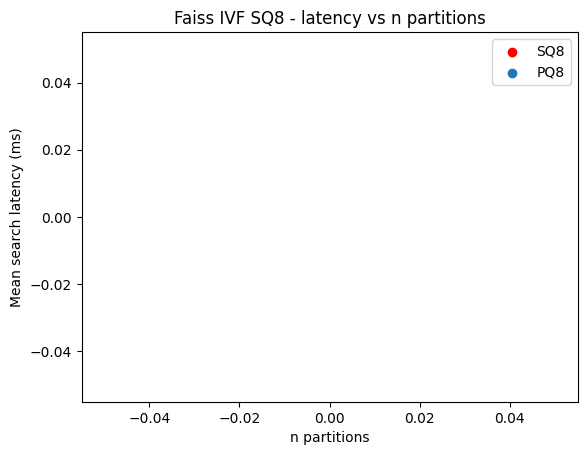

In [38]:
df_plot = df_results.query("Compression == 'SQ8'")
plt.scatter(df_plot.NPartitions, df_plot.SearchSpeedAverage/10, label="SQ8", c="red")
df_plot = df_results.query("Compression == 'PQ8'")
plt.scatter(df_plot.NPartitions, df_plot.SearchSpeedAverage / 10, label="PQ8")
plt.title("Faiss IVF SQ8 - latency vs n partitions")
plt.xlabel("n partitions")
plt.ylabel("Mean search latency (ms)")
plt.legend()
plt.show()

### n partitions plot

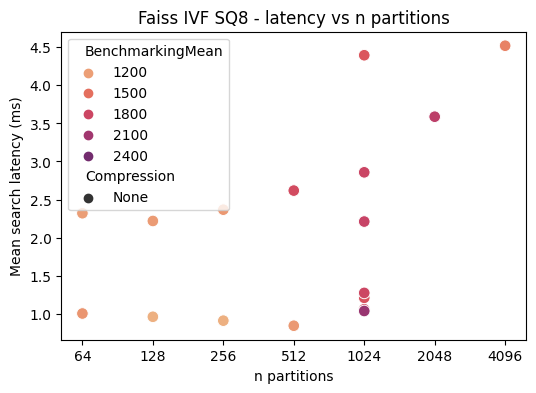

In [39]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_results, x="NPartitions", y="SearchSpeedAverage", hue="BenchmarkingMean", style="Compression", palette="flare", s=70)
plt.title("Faiss IVF SQ8 - latency vs n partitions")
plt.xlabel("n partitions")
plt.ylabel("Mean search latency (ms)")
plt.show()

In [40]:
df_results.columns

Index(['Unnamed: 0', 'Dataset', 'Index', 'IndexParameters', 'TimerMasterMean',
       'TimerServerStartupMean', 'TimerBuildIndexMean', 'SearchSpeedAverage',
       'SearchSpeedP95', 'RecallMean', 'RecallAt1Mean', 'RecallAt10Mean',
       'RecallAt100Mean', 'RecallAt1000Mean', 'BaselineMax', 'BaselineMean',
       'IngestingMax', 'IngestingMean', 'BenchmarkingMax', 'BenchmarkingMean',
       'IndexProvider', 'IndexType', 'Compression', 'EfConstruction',
       'EfSearch', 'M', 'Metric', 'NPartitions'],
      dtype='object')

### n partions plot again

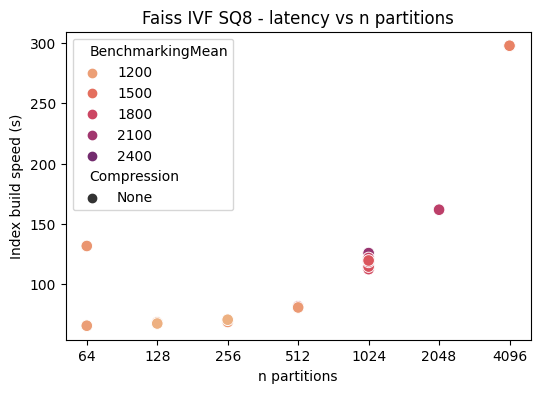

In [41]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_results,
    x="NPartitions",
    y="TimerBuildIndexMean",
    hue="BenchmarkingMean",
    style="Compression",
    palette="flare",
    s=70,
)
plt.title("Faiss IVF SQ8 - latency vs n partitions")
plt.xlabel("n partitions")
plt.ylabel("Index build speed (s)")
plt.show()

In [42]:
df_results.columns

Index(['Unnamed: 0', 'Dataset', 'Index', 'IndexParameters', 'TimerMasterMean',
       'TimerServerStartupMean', 'TimerBuildIndexMean', 'SearchSpeedAverage',
       'SearchSpeedP95', 'RecallMean', 'RecallAt1Mean', 'RecallAt10Mean',
       'RecallAt100Mean', 'RecallAt1000Mean', 'BaselineMax', 'BaselineMean',
       'IngestingMax', 'IngestingMean', 'BenchmarkingMax', 'BenchmarkingMean',
       'IndexProvider', 'IndexType', 'Compression', 'EfConstruction',
       'EfSearch', 'M', 'Metric', 'NPartitions'],
      dtype='object')

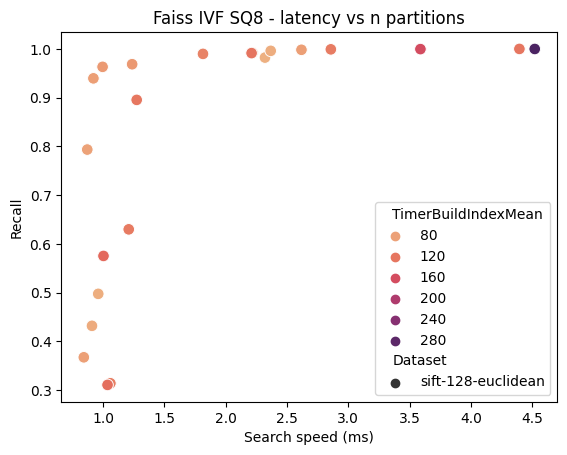

In [43]:
import seaborn as sns

# plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_results,
    x="SearchSpeedAverage",
    y="RecallMean",
    style="Dataset",
    hue="TimerBuildIndexMean",
    palette="flare",
    s=70,
)
plt.title("Faiss IVF SQ8 - latency vs n partitions")
plt.ylabel("Recall")
plt.xlabel("Search speed (ms)")
plt.show()

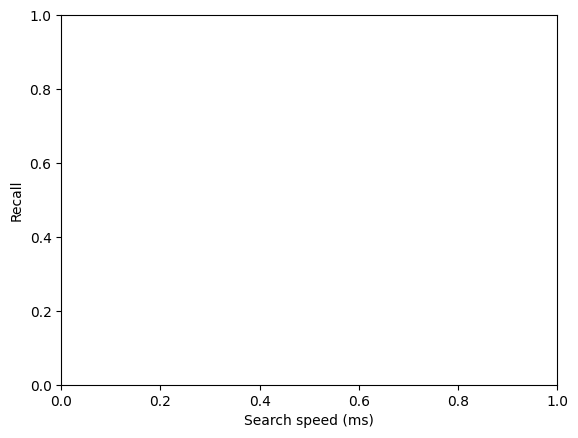

In [47]:
df_plot = df_results.query("Dataset == 'glove-25-angular'")

# plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_plot,
    x="SearchSpeedAverage",
    y="RecallMean",
    style="Metric",
    hue="TimerBuildIndexMean",
    # palette="flare",
    s=70,
)
plt.ylabel("Recall")
plt.xlabel("Search speed (ms)")
plt.show()

In [48]:
df_results.query('Metric == "IP" and Dataset == "glove-25-angular"')

,Unnamed: 0,Dataset,Index,IndexParameters,TimerMasterMean,TimerServerStartupMean,TimerBuildIndexMean,SearchSpeedAverage,SearchSpeedP95,RecallMean,...,BenchmarkingMax,BenchmarkingMean,IndexProvider,IndexType,Compression,EfConstruction,EfSearch,M,Metric,NPartitions


In [50]:
df_plot = df_results.query("IndexType == 'IVF'")

# plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_plot,
    x="Recall avg",
    y="Search speed avg. (ms)",
    style="Metric",
    hue="IndexProvider",
    palette="flare",
    s=70,
)
plt.xlabel("Recall")
plt.ylabel("Search speed (ms)")
plt.show()

ValueError: Could not interpret value `Recall avg` for parameter `x`

In [51]:
df_plot

,Unnamed: 0,Dataset,Index,IndexParameters,TimerMasterMean,TimerServerStartupMean,TimerBuildIndexMean,SearchSpeedAverage,SearchSpeedP95,RecallMean,...,BenchmarkingMax,BenchmarkingMean,IndexProvider,IndexType,Compression,EfConstruction,EfSearch,M,Metric,NPartitions
0,0,sift-128-euclidean,"index: milvus IVF, n_partition=64, None, L2","IVF, n_partition=64, None, L2",161.984408,91.158141,65.742976,2.320321,2.548022,0.982151,...,1716.708,1203.750538,milvus,IVF,None,NaN,NaN,NaN,L2,64
1,1,sift-128-euclidean,"index: milvus IVF, n_partition=128, None, L2","IVF, n_partition=128, None, L2",165.023545,91.434945,68.507926,2.218690,2.435784,0.991873,...,1727.580,1226.194077,milvus,IVF,None,NaN,NaN,NaN,L2,128
2,2,sift-128-euclidean,"index: milvus IVF, n_partition=256, None, L2","IVF, n_partition=256, None, L2",165.876709,91.942128,68.853711,2.367089,2.621065,0.995921,...,1763.804,1249.281615,milvus,IVF,None,NaN,NaN,NaN,L2,256
3,3,sift-128-euclidean,"index: milvus IVF, n_partition=512, None, L2","IVF, n_partition=512, None, L2",188.140312,101.273602,81.785626,2.617808,3.437749,0.998081,...,3522.008,1751.865933,milvus,IVF,None,NaN,NaN,NaN,L2,512
4,4,sift-128-euclidean,"index: milvus IVF, n_partition=1024, None, L2","IVF, n_partition=1024, None, L2",210.754938,91.788467,113.886073,2.857559,3.806693,0.999030,...,3328.900,1823.883824,milvus,IVF,None,NaN,NaN,NaN,L2,1024
5,5,sift-128-euclidean,"index: milvus IVF, n_partition=2048, None, L2","IVF, n_partition=2048, None, L2",268.749255,101.867774,161.801337,3.588178,4.486139,0.999511,...,2149.064,1920.769800,milvus,IVF,None,NaN,NaN,NaN,L2,2048
6,6,sift-128-euclidean,"index: milvus IVF, n_partition=4096, None, L2","IVF, n_partition=4096, None, L2",394.264325,91.554489,297.609647,4.520539,4.998783,0.999775,...,1424.634,1386.330383,milvus,IVF,None,NaN,NaN,NaN,L2,4096
7,7,sift-128-euclidean,"index: milvus IVF, n_partition=64, None, L2","IVF, n_partition=64, None, L2",238.794323,101.900144,131.772166,1.003152,1.279109,0.575082,...,1818.710,1268.213100,milvus,IVF,None,NaN,NaN,NaN,L2,64
8,8,sift-128-euclidean,"index: milvus IVF, n_partition=128, None, L2","IVF, n_partition=128, None, L2",163.729941,91.079997,67.568300,0.960180,1.221338,0.497288,...,1146.950,1092.080000,milvus,IVF,None,NaN,NaN,NaN,L2,128
9,9,sift-128-euclidean,"index: milvus IVF, n_partition=256, None, L2","IVF, n_partition=256, None, L2",167.164632,91.365211,70.713892,0.909274,1.199511,0.431680,...,1167.740,1094.865556,milvus,IVF,None,NaN,NaN,NaN,L2,256


In [52]:
df_plot = df_results.query("IndexType == 'IVF'")

# plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_plot,
    x="Recall avg",
    y="Search speed avg. (ms)",
    style="Metric",
    hue="nPartitions",
    palette="flare",
    s=70,
)
plt.xlabel("Recall")
plt.ylabel("Search speed (ms)")
plt.show()

ValueError: Could not interpret value `Recall avg` for parameter `x`

In [53]:
print("hello")

hello
